In [1]:
import numpy as nu
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Analise exploratoria

In [2]:
df = pd.read_csv('dados.csv')

In [11]:
df.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


## Pergunta 1: Qual a correlação entre as variaveis

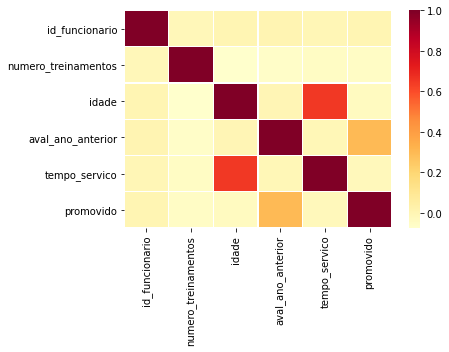

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
correlacao = df.corr()
sns.heatmap(correlacao, cmap = 'YlOrRd', linewidths = 0.1)
plt.show()

## Pergunta 2: Qual o tempo de serviço da maioria dos funcionarios

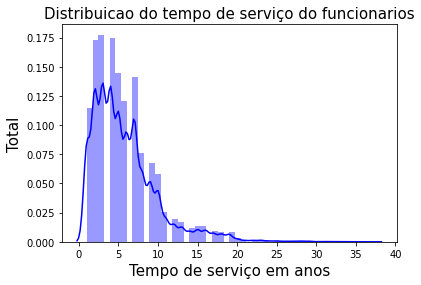

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['tempo_servico'],color='blue')
plt.title('Distribuicao do tempo de serviço do funcionarios', fontsize=15)
plt.xlabel('Tempo de serviço em anos', fontsize=15)
plt.ylabel('Total' ,fontsize=15)
plt.show()

## Pergunta 3: Qual avaliação do ano anterior foi mais comum

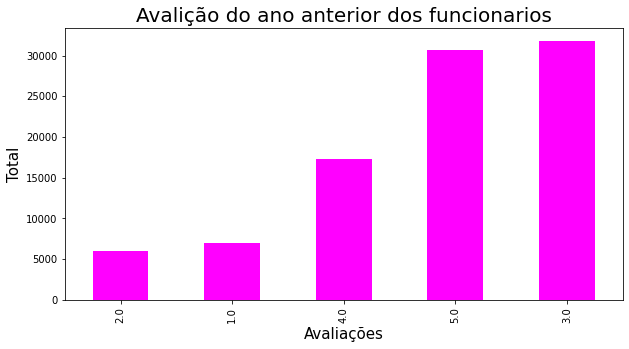

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
df['aval_ano_anterior'].value_counts().sort_values().plot.bar(color = 'magenta',figsize=(10, 5))
plt.title('Avalição do ano anterior dos funcionarios', fontsize=20)
plt.xlabel('Avaliações', fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.show()

## Pergunta 4: Qual adistribuicao de idade dos funcionarios

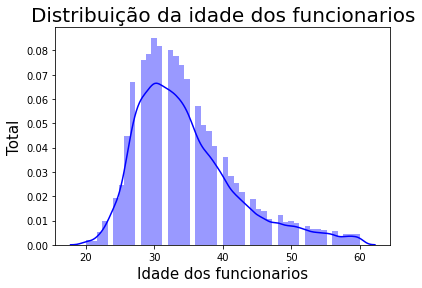

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['idade'],color='blue')
plt.title('Distribuição da idade dos funcionarios', fontsize=20)
plt.xlabel('Idade dos funcionarios', fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.show()

## Pergunta 5: Qual o numero de treinamento mais frequente

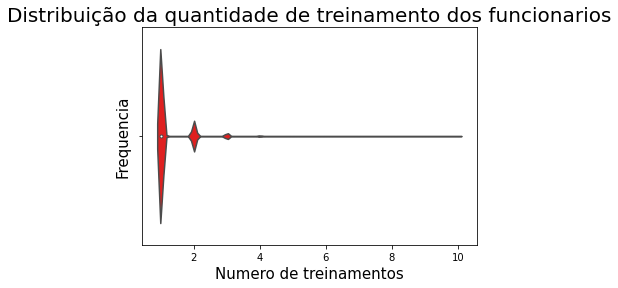

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(df['numero_treinamentos'],color='red')
plt.title('Distribuição da quantidade de treinamento dos funcionarios', fontsize=20)
plt.xlabel('Numero de treinamentos', fontsize=15)
plt.ylabel('Frequencia', fontsize=15)
plt.show()

## Pergunta 6: Qual o numero de funcionarios por canal de recrutamento

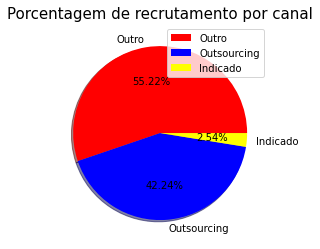

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
data = df['canal_recrutamento'].value_counts()
fatias = data.values
labs = data.index
cores = ['red','blue','yellow']
explode =[0,0,0]
plt.pie(fatias, labels = labs,colors=cores,explode = explode, shadow = True, autopct='%.2f%%')
plt.title('Porcentagem de recrutamento por canal', fontsize=15)
plt.axis('off')
plt.legend()
plt.show()


## Pergunta 7: Qual a relação entre a promoção e a avaliação anterior

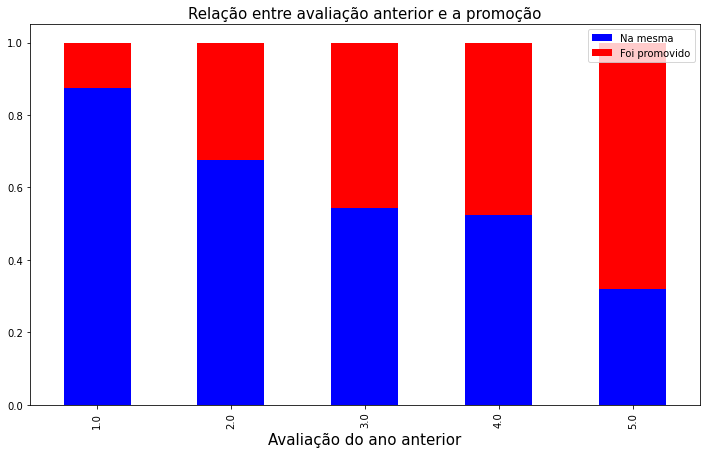

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pf
data = pd.crosstab(df['aval_ano_anterior'],df['promovido'])
data = data.div(data.sum(1).astype(float), axis =0).plot(kind = 'bar',
        stacked = True,
        figsize=(12,7),
        color = ['blue','red']
        )
plt.title('Relação entre avaliação anterior e a promoção', fontsize=15)
plt.xlabel('Avaliação do ano anterior', fontsize=15)
plt.legend(['Na mesma','Foi promovido'])
plt.show()